In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import math

In [2]:
df = pd.read_csv('emails.csv')
df.head()
df.shape
print(df)

                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]


In [3]:
#Labels of Train data

y_train = np.array([])
y_train = df['spam'].to_numpy()
print(y_train)

[1 1 1 ... 0 0 0]


In [5]:
#Function to Process the text data and 1. Remove Punctuation 2.Stop Words 3.Stemming
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

df['text']=df['text'].apply(process_text)

In [6]:
#Convert mails to feature vectors
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df['text'])

In [7]:
#Extract training data in x_train


# print(vectorizer.get_feature_names())
# print(message_bow)
x_train = np.array([[]])
x_train = message_bow.toarray()
#n(rows) and n(cols)
num_rows, num_cols = x_train.shape
#Convert >1 to 1
c = (x_train >= 1).astype(int)

In [28]:
#TO FIND ELBOW POINTS TAKE k = 1 to 10
#x_train - datapoints
#k - number of clusters
#z - cluster to which x belongs
#centroid - centroid of each cluster in current iteration
#dist - used to find minimum distance from centroid in current iteration of each points



#init z as 0
z = np.zeros(num_rows, dtype = int)


iterations = 10
wcss = np.array([])
for k in range(2,11):
    #init centroid as first k elements of training set
    centroid = np.array([np.zeros(num_cols)], dtype=float)
    for i in range(k-1):
        centroid = np.vstack((centroid,x_train[i]))
    centroid = np.delete(centroid,(0),axis=0)
    print(centroid)
    

    for i in range(num_rows):
        z[i] = rd.randint(0,k-2)
    print(z)
    for t in range(iterations):
        #Find the distance of all points from centroid
        for i in range(num_rows):
            temp_dist = (math.inf)
            for j in range(k-1):
                if(temp_dist>np.linalg.norm(centroid[j]-x_train[i])):
                    temp_dist = np.linalg.norm(centroid[j]-x_train[i])
                    temp_cluster = j
            z[i] = temp_cluster
        #Find mean or updated centroid
        for j in range(k-1):
            temp_arr = np.zeros(num_cols)
            cnt = 0
            for i in range(num_rows):
                if z[i] == j:
                    temp_arr = temp_arr + x_train[i]
                    cnt = cnt+1
            centroid[j] = (temp_arr/cnt)
    sum_wcss = 0
    for j in range(k-1):
        for i in range(num_rows):
            if z[i] == j:
                sum_wcss = sum_wcss + np.linalg.norm(centroid[j]-x_train[i])
    wcss = np.append(wcss,sum_wcss)
    print(z)
    print(centroid)
print(wcss)

[[0. 0. 0. ... 0. 0. 0.]]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[[3.47067039e-01 1.75803073e-01 2.32192737e-02 ... 1.74581006e-04
  3.49162011e-04 1.39664804e-03]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[[1.20392157e+00 1.76470588e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.07144162e-01 1.75771971e-01 2.43011146e-02 ... 1.82715147e-04
  3.65430294e-04 1.46172118e-03]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2 1 1 ... 1 2 0]
[2 2 2 ... 2 2 2]
[[2.87500000e+00 1.52500000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.17557252e+00 1.41221374e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.99816514e-01 1.33211009e-01 2.44036697e-02 ... 1.83486239e-04
  3.66972477e-04 1.46788991e-03]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 3 2 ... 3 1 3]
[2 2 2 ... 2 3 2]
[[1.6

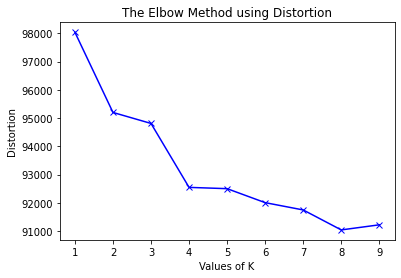

In [29]:
K = np.arange(start=1, stop=10, step=1)
plt.plot(K, wcss, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


In [32]:
#Selected 4 as k value using The Elbow Method*
#Apply K-Means
k = 4

#init centroid as first k elements of training set
centroid = np.array([np.zeros(num_cols)], dtype=float)
for i in range(k):
    centroid = np.vstack((centroid,x_train[i]))
centroid = np.delete(centroid,(0),axis=0)
print(centroid)
    

for i in range(num_rows):
    z[i] = rd.randint(0,k-1)
print(z)
for t in range(iterations):
    #Find the distance of all points from centroid
    for i in range(num_rows):
        temp_dist = (math.inf)
        for j in range(k):
            if(temp_dist>np.linalg.norm(centroid[j]-x_train[i])):
                temp_dist = np.linalg.norm(centroid[j]-x_train[i])
                temp_cluster = j
        z[i] = temp_cluster
    #Find mean or updated centroid
    for j in range(k):
        temp_arr = np.zeros(num_cols)
        cnt = 0
        for i in range(num_rows):
            if z[i] == j:
                temp_arr = temp_arr + x_train[i]
                cnt = cnt+1
        centroid[j] = (temp_arr/cnt)
#     sum_wcss = 0
#     for j in range(k-1):
#         for i in range(num_rows):
#             if z[i] == j:
#                 sum_wcss = sum_wcss + np.linalg.norm(centroid[j]-x_train[i])
#     wcss = np.append(wcss,sum_wcss)
print(z)
print(centroid)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 2 0 ... 3 2 2]
[2 2 2 ... 2 3 2]
[[1.66666667e+00 1.36666667e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.30000000e+00 2.50000000e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.65100671e-01 1.40729866e-01 2.72651007e-02 ... 2.09731544e-04
  4.19463087e-04 1.67785235e-03]
 [7.21185510e-01 2.32711306e-01 3.29308452e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [37]:
for j in range(k):
    cnt = 0
    spam = 0
    for i in range(num_rows):
        if z[i] == j:
            cnt = cnt + 1
            spam = spam + y_train[i]
#     print()
#     print(j)
#     print("Spam:")
#     print(spam)
#     print("Cnt:")
#     print(cnt)




0
Spam:
4
Cnt:
9

1
Spam:
0
Cnt:
40

2
Spam:
1363
Cnt:
4768

3
Spam:
1
Cnt:
911
